**Загрузить данные из файла data.csv в объект Pandas**

Аделя Галеева группа 09-812

In [20]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [21]:
# Ваш код здесь
df = pd.read_csv('data.csv')  

**Данные представлены в виде таблицы. Вывести на печать первые 8 строк:**

In [22]:
# Ваш код здесь
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Вывести статистики по датасету

In [23]:
# Ваш код здесь
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Прочитать данные с учетом индекса index_col='PassengerId'

In [24]:
data = pd.read_csv("data.csv", index_col='PassengerId')

-	PassengerId - идентификатор пассажира
-	Survival - поле в котором указано спасся человек(1) или нет (0)
-	Pclass - содержит социально-экономический статус:  
 1. высокий
 2. средний
 3. низкий

-	Name - имя пассажира
-	Sex - пол пассажира
-	Age - возраст
-	SibSp - содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)
-	Parch - содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)
-	Ticket - номер билета
-	Fare - цена билета
-	Cabin - каюта
-	Embarked - порт посадки:
 *	C - Cherbourg
 *	Q - Queenstown
 *	S - Southampton


Можно предположить, что чем выше социальный статус, тем больше вероятность спасения. Давайте проверим это взглянув на количество спасшихся и утонувших в зависимости в разрезе классов. Для этого нужно построить следующую сводную таблицу:

In [ ]:
data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

Правда ли то, что чем выше у пассажиров их социальное положение, тем выше их вероятность спасения?


<AxesSubplot:xlabel='Pclass'>

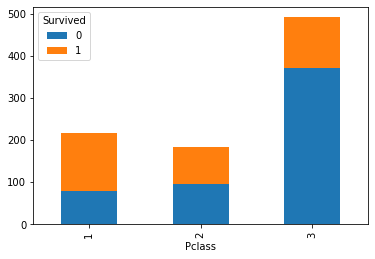

In [26]:
df.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

Наше вышеописанное предположение про то, что чем выше у пассажиров их социальное положение, тем выше их вероятность спасения.

Теперь давайте взглянем столбец с номерами кают. Можно ли использовать эти данные.

In [27]:
df.PassengerId[df.Cabin.notnull()].count()

204

Графически отобразите, как количество родственников влияет на факт спасения:

<AxesSubplot:title={'center':'Parch'}, xlabel='Parch'>

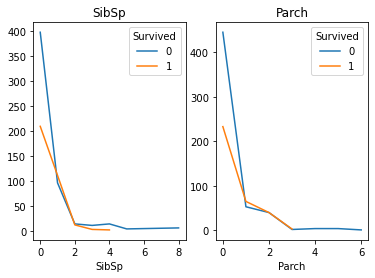

In [28]:
fig, axes = plt.subplots(ncols=2)
df.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
df.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

Что видно из графиков? Сколько людей имеющих больше 1 родственников спаслись?

людей имеющих больше 1 родственников спаслись не многие.

Рассмотрите поле Age в котором записан возраст. Посмортирите на сколько оно заполено:

In [29]:
# Ваш код здесь
df.PassengerId[df.Age.notnull()].count()

714

есть ли пустые значения, которые не определены. Если да, то заполните пропуски значением равным медиане по возрату из всей выборки. 

In [30]:
df.Age = df.Age.median()

У нас осталось разобраться с полями Ticket, Embarked, Fare, Name. Посмотрите на поле Embarked, в котором находится порт посадки и проверьте есть ли такие пассажиры у которых порт не указан:

In [31]:
# Ваш код здесь
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,28.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,28.0,0,0,113572,80.0,B28,NaN


**Отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 180 у.е. за билет.**


In [32]:
# Ваш код здесь
df[(df['Embarked'] == 'C') & (df.Fare > 180)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,28.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,28.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,28.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,28.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,28.0,0,2,113503,211.5000,C82,C


**Отсортировать этих людей по убыванию платы за билет.**

In [33]:
# Ваш код здесь
df[(df['Embarked'] == 'C') & (df['Fare'] > 180)].sort_values(by='Fare', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,28.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,28.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,28.0,0,0,PC 17755,512.3292,B101,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,28.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,28.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [34]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [35]:
age_categories = [age_category(age) for age in df.Age]

In [36]:
df['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [37]:
df['Age_category'] = df['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин правильный ответ

In [38]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108 правильный ответ
- 112
- 125

In [39]:
# Ваш код здесь
pd.crosstab(df['Pclass'], df['Sex'], margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69 правильный ответ
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [40]:
# Ваш код здесь
print("Median fare: ", round(df['Fare'].median(), 2))
print("Fare std: ", round(df['Fare'].std(), 2))

Median fare:  14.45
Fare std:  49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых правильный ответ
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [41]:
# Ваш код здесь
young_survived = data[data['Age'] < 30]['Survived']
old_survived = data[data['Age'] > 60]['Survived']

print("Доли выживших: \n\t среди молодых {}%, \n\t среди старых {}%.".format(round(100 * young_survived.mean(), 1), 
                                                                             round(100 * old_survived.mean(), 1)))

Доли выживших: 
	 среди молодых 40.6%, 
	 среди старых 22.7%.


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин правильный ответ

In [42]:
# Ваш код здесь
male_survived = data[data['Sex'] == 'male']['Survived']
female_survived = data[data['Sex'] == 'female']['Survived']


print("Доли выживыших: \n\t среди женщин {}%, \n\t среди мужчин {}%".format(round(100 * female_survived.mean(), 1), 
                                                                            round(100 * male_survived.mean(), 1)))

Доли выживыших: 
	 среди женщин 74.2%, 
	 среди мужчин 18.9%


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William +
- John

In [43]:
# Ваш код здесь
first_names = data[data['Sex'] == 'male']['Name'].apply(lambda full_name: full_name.split(',')[1].split()[1])
first_names.value_counts().head()

William    35
John       25
George     14
Charles    13
Thomas     13
Name: Name, dtype: int64

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да +
- Нет

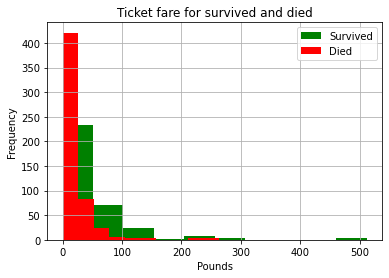

In [44]:
# Ваш код здесь
data[data['Survived'] == 1]['Fare'].hist(color="green",label='Survived')
data[data['Survived'] == 0]['Fare'].hist(color="red",label='Died')
plt.title('Ticket fare for survived and died')
plt.xlabel('Pounds')
plt.ylabel('Frequency')
plt.legend();

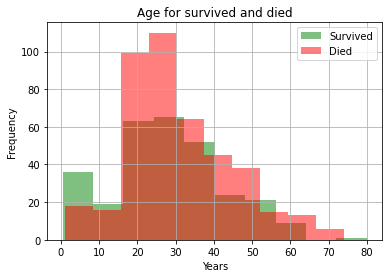

In [45]:
data[data['Survived'] == 1]['Age'].hist(color="green",label='Survived', alpha=.5)
data[data['Survived'] == 0]['Age'].hist(color="red",label='Died', alpha=.5)
plt.title('Age for survived and died')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.legend();

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет +
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса +
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса +

In [46]:
# Ваш код здесь
pd.crosstab(data['Pclass'], data['Sex'],values=data['Age'], aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589
